In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datalaptop-0-1.xlsx to datalaptop-0-1.xlsx


In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [ ]:
pf=pd.read_excel('datalaptop-0-1.xlsx')
pf.head()

,Unnamed: 0,Price,display,ram_in_gb,storage_in_SSD,storage_in_HDD,processor_name,disk_drive,company,graphic_card_company,graphic_card,processor_type,touchscreen,processer_chip_name,processor_name_Intel,processor_name_AMD,processor_name_Microsoft,processor_name_Apple,company_name,company_name_LG,company_name_Asus,company_name_HP,company_name_MSI,company_name_Dell,company_name_Acer,company_name_Lenovo,company_name_Apple,company_name_Avita,company_name_Microsoft,company_name_VGS,disk_drive_name,disk_drive_SSD,disk_drive_Both,disk_drive_HDD,disk_drive_eMMC,graphic_card_company_name,graphic_card_company_Intel,graphic_card_company_NVIDIA,graphic_card_company_Radeon,graphic_card_company_AMD,graphic_card_company_Onboard,graphic_card_name,graphic_card_Iris,graphic_card_GTX,graphic_card_RTX,graphic_card_MX,graphic_card_UHD,graphic_card_HD,graphic_card_Vega,graphic_card_AMD,graphic_card_RX,graphic_card_Quadro,graphic_card_Onboard,processor_type_name,processor_type_SQ2,processor_type_M3,processor_type_Celeron,processor_type_Pentium,processor_type_i9,processor_type_i7,processor_type_i5,processor_type_i3,processor_type_Ryzen9,processor_type_Ryzen7,processor_type_Ryzen5,processor_type_Ryzen3,processor_type_M1,touchscreen_name,touchscreen_binary
0,0,44850000,17.0,16,256,0,Intel,SSD,LG,Intel,Iris,i7,No,Intel,1,0,0,0,LG,1,0,0,0,0,0,0,0,0,0,0,SSD,1,0,0,0,Intel,1,0,0,0,0,Iris,1,0,0,0,0,0,0,0,0,0,0,i7,0,0,0,0,0,1,0,0,0,0,0,0,0,No,0
1,1,39900000,16.0,8,512,0,Intel,SSD,LG,Intel,Iris,i5,No,Intel,1,0,0,0,LG,1,0,0,0,0,0,0,0,0,0,0,SSD,1,0,0,0,Intel,1,0,0,0,0,Iris,1,0,0,0,0,0,0,0,0,0,0,i5,0,0,0,0,0,0,1,0,0,0,0,0,0,No,0
2,2,47900000,14.0,16,512,0,Intel,SSD,LG,Intel,Iris,i7,No,Intel,1,0,0,0,LG,1,0,0,0,0,0,0,0,0,0,0,SSD,1,0,0,0,Intel,1,0,0,0,0,Iris,1,0,0,0,0,0,0,0,0,0,0,i7,0,0,0,0,0,1,0,0,0,0,0,0,0,No,0
3,3,27450000,15.6,8,512,0,Intel,SSD,Asus,NVIDIA,GTX,i7,No,Intel,1,0,0,0,Asus,0,1,0,0,0,0,0,0,0,0,0,SSD,1,0,0,0,NVIDIA,0,1,0,0,0,GTX,0,1,0,0,0,0,0,0,0,0,0,i7,0,0,0,0,0,1,0,0,0,0,0,0,0,No,0
4,4,28590000,15.6,8,512,0,Intel,SSD,Asus,NVIDIA,GTX,i7,No,Intel,1,0,0,0,Asus,0,1,0,0,0,0,0,0,0,0,0,SSD,1,0,0,0,NVIDIA,0,1,0,0,0,GTX,0,1,0,0,0,0,0,0,0,0,0,i7,0,0,0,0,0,1,0,0,0,0,0,0,0,No,0


In [ ]:
pf.drop('Unnamed: 0',axis=1,inplace=True)
# pf.drop('Unnamed: 0.1',axis=1,inplace=True)

In [ ]:
# for i in pf.columns:
#   print(i)
#   print(pf[i].unique())

In [ ]:
pf.describe()

,Price,display,ram_in_gb,storage_in_SSD,storage_in_HDD,processor_name_Intel,processor_name_AMD,processor_name_Microsoft,processor_name_Apple,company_name_LG,company_name_Asus,company_name_HP,company_name_MSI,company_name_Dell,company_name_Acer,company_name_Lenovo,company_name_Apple,company_name_Avita,company_name_Microsoft,company_name_VGS,disk_drive_SSD,disk_drive_Both,disk_drive_HDD,disk_drive_eMMC,graphic_card_company_Intel,graphic_card_company_NVIDIA,graphic_card_company_Radeon,graphic_card_company_AMD,graphic_card_company_Onboard,graphic_card_Iris,graphic_card_GTX,graphic_card_RTX,graphic_card_MX,graphic_card_UHD,graphic_card_HD,graphic_card_Vega,graphic_card_AMD,graphic_card_RX,graphic_card_Quadro,graphic_card_Onboard,processor_type_SQ2,processor_type_M3,processor_type_Celeron,processor_type_Pentium,processor_type_i9,processor_type_i7,processor_type_i5,processor_type_i3,processor_type_Ryzen9,processor_type_Ryzen7,processor_type_Ryzen5,processor_type_Ryzen3,processor_type_M1,touchscreen_binary
count,1.014000e+03,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,2.534568e+07,14.689349,9.157791,420.646943,92.268245,0.853057,0.128205,0.002959,0.015779,0.023669,0.227811,0.151874,0.094675,0.177515,0.091716,0.107495,0.055227,0.011834,0.049310,0.008876,0.903353,0.071006,0.021696,0.003945,0.335306,0.231755,0.028600,0.029586,0.374753,0.031558,0.167653,0.065089,0.106509,0.096647,0.074951,0.030572,0.021696,0.006903,0.017751,0.380671,0.002959,0.002959,0.018738,0.022682,0.013807,0.275148,0.414201,0.093688,0.006903,0.050296,0.059172,0.023669,0.015779,0.046351
std,1.611998e+07,1.138002,6.163674,264.657755,294.198768,0.354224,0.334483,0.054339,0.124681,0.152090,0.419627,0.359076,0.292909,0.382292,0.288767,0.309894,0.228535,0.108193,0.216621,0.093838,0.295622,0.256961,0.145762,0.062714,0.472330,0.422162,0.166761,0.169525,0.484298,0.174907,0.373742,0.246804,0.308640,0.295622,0.263442,0.172240,0.145762,0.082840,0.132112,0.485791,0.054339,0.054339,0.135664,0.148963,0.116746,0.446809,0.492827,0.291538,0.082840,0.218663,0.236062,0.152090,0.124681,0.210348
min,5.790000e+06,10.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.601175e+07,14.000000,8.000000,256.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.058900e+07,14.000000,8.000000,512.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
pf.drop(['processor_name','disk_drive','company','graphic_card_company','graphic_card','processor_type','touchscreen','processer_chip_name','company_name',
         'disk_drive_name','graphic_card_company_name','graphic_card_name','touchscreen_name','processor_type_name'],axis=1,inplace=True)

In [ ]:
pf.head()

,Price,display,ram_in_gb,storage_in_SSD,storage_in_HDD,processor_name_Intel,processor_name_AMD,processor_name_Microsoft,processor_name_Apple,company_name_LG,company_name_Asus,company_name_HP,company_name_MSI,company_name_Dell,company_name_Acer,company_name_Lenovo,company_name_Apple,company_name_Avita,company_name_Microsoft,company_name_VGS,disk_drive_SSD,disk_drive_Both,disk_drive_HDD,disk_drive_eMMC,graphic_card_company_Intel,graphic_card_company_NVIDIA,graphic_card_company_Radeon,graphic_card_company_AMD,graphic_card_company_Onboard,graphic_card_Iris,graphic_card_GTX,graphic_card_RTX,graphic_card_MX,graphic_card_UHD,graphic_card_HD,graphic_card_Vega,graphic_card_AMD,graphic_card_RX,graphic_card_Quadro,graphic_card_Onboard,processor_type_SQ2,processor_type_M3,processor_type_Celeron,processor_type_Pentium,processor_type_i9,processor_type_i7,processor_type_i5,processor_type_i3,processor_type_Ryzen9,processor_type_Ryzen7,processor_type_Ryzen5,processor_type_Ryzen3,processor_type_M1,touchscreen_binary
0,44850000,17.0,16,256,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,39900000,16.0,8,512,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,47900000,14.0,16,512,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,27450000,15.6,8,512,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,28590000,15.6,8,512,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
pf.corr()

,Price,display,ram_in_gb,storage_in_SSD,storage_in_HDD,processor_name_Intel,processor_name_AMD,processor_name_Microsoft,processor_name_Apple,company_name_LG,company_name_Asus,company_name_HP,company_name_MSI,company_name_Dell,company_name_Acer,company_name_Lenovo,company_name_Apple,company_name_Avita,company_name_Microsoft,company_name_VGS,disk_drive_SSD,disk_drive_Both,disk_drive_HDD,disk_drive_eMMC,graphic_card_company_Intel,graphic_card_company_NVIDIA,graphic_card_company_Radeon,graphic_card_company_AMD,graphic_card_company_Onboard,graphic_card_Iris,graphic_card_GTX,graphic_card_RTX,graphic_card_MX,graphic_card_UHD,graphic_card_HD,graphic_card_Vega,graphic_card_AMD,graphic_card_RX,graphic_card_Quadro,graphic_card_Onboard,processor_type_SQ2,processor_type_M3,processor_type_Celeron,processor_type_Pentium,processor_type_i9,processor_type_i7,processor_type_i5,processor_type_i3,processor_type_Ryzen9,processor_type_Ryzen7,processor_type_Ryzen5,processor_type_Ryzen3,processor_type_M1,touchscreen_binary
Price,1.000000,0.119406,0.765354,0.489692,-0.081568,0.000440,-0.043179,0.078843,0.080223,0.086749,-0.101221,-0.101072,0.138410,-0.097202,-0.094203,-0.071162,0.215304,-0.038913,0.263099,0.100813,0.101146,-0.190625,0.159035,-0.065358,-0.021528,0.200984,-0.025412,0.003294,-0.146604,0.042474,0.121426,0.414516,-0.087291,-0.166750,-0.110898,-0.087893,0.080839,-0.000476,0.209872,-0.152319,0.078843,-0.024839,-0.154721,-0.163021,0.423710,0.398415,-0.221143,-0.238358,0.190150,0.089474,-0.126661,-0.145213,0.080223,0.243273
display,0.119406,1.000000,0.123216,0.150344,0.121606,-0.024702,0.079838,-0.012261,-0.138658,0.076745,0.084674,-0.055949,0.255645,0.020007,0.052241,-0.037059,-0.198530,-0.053495,-0.319428,0.075764,-0.100189,0.048838,0.147794,-0.071336,0.020057,0.347472,-0.002035,0.065085,-0.344535,-0.025587,0.290614,0.233742,0.055510,-0.043887,-0.075044,-0.033088,0.071023,0.082458,0.064950,-0.342290,-0.012261,-0.200633,0.039659,-0.005561,0.103646,0.189236,-0.177295,-0.058283,0.034289,0.125928,-0.002796,0.015147,-0.138658,-0.162067
ram_in_gb,0.765354,0.123216,1.000000,0.570017,-0.114628,-0.019663,-0.006949,0.107658,0.027586,0.012861,-0.039484,-0.113426,0.166689,-0.089822,-0.064157,-0.087962,0.055478,-0.020567,0.217451,0.309912,0.130817,-0.174120,0.064310,-0.052688,-0.068376,0.220767,-0.043772,-0.010141,-0.107135,-0.008286,0.131633,0.363133,-0.051394,-0.156822,-0.136176,-0.092885,0.033544,0.022998,0.178401,-0.110414,0.107658,-0.010237,-0.115692,-0.123245,0.328960,0.340161,-0.187277,-0.236218,0.200866,0.085662,-0.082411,-0.130355,0.027586,0.196124
storage_in_SSD,0.489692,0.150344,0.570017,1.000000,-0.420058,-0.068104,0.081315,-0.016333,-0.017541,0.009233,0.064769,-0.050065,0.145194,-0.164739,0.034822,-0.056360,-0.059348,0.155560,-0.026041,0.209166,0.441600,-0.439631,-0.077542,-0.100073,-0.109704,0.227989,-0.066716,-0.013981,-0.063878,0.004506,0.062935,0.326765,0.034541,-0.117990,-0.175697,-0.055093,-0.028410,0.005740,0.064721,-0.061438,-0.016333,-0.060264,-0.121203,-0.162129,0.197543,0.273210,-0.117219,-0.226321,0.116684,0.158351,-0.020965,-0.090632,-0.017541,0.138696
storage_in_HDD,-0.081568,0.121606,-0.114628,-0.420058,1.000000,0.063921,-0.050107,-0.017093,-0.039730,-0.048856,0.085448,-0.025205,-0.021282,0.086927,-0.082140,0.053779,-0.075864,-0.034339,-0.071462,-0.029694,-0.959313,0.847692,0.459713,-0.019747,0.068744,0.042260,0.046766,0.014725,-0.125141,-0.046821,0.029972,0.012376,-0.010491,0.078973,0.120996,0.041684,0.034118,-0.026161,-0.042182,-0.128581,-0.017093,-0.017093,0.055574,0.132941,0.106581,-0.103206,-0.021901,0.117793,0.014344,-0.072210,-0.007620,0.039394,-0.039730,-0.069177
processor_name_Intel,0.000440,-0.024702,-0.019663,-0.068104,0.063921,1.000000,-0.923976,-0.131250,-0.305077,0.064621,-0.219535,0.059211,0.105671,0.149075,-0.041830,-0.008842,-0.094765,0.019661,0.017331,0.039276,-0.069764,0.049671,0.042688,0.026119,0.194474,-0.062505,-0.196173,-0.141240,-0.018194,0.074921,0.007310,-0.127617,0.089119,0.107472,0.054667,-0.298437,0

In [ ]:
# pf.to_excel("data_final_binary.xlsx")

In [ ]:
X = pf.drop('Price',axis=1)
Y = pf['Price'].values

In [ ]:
Y.max()

149999000

In [ ]:
min_max_scaler=MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)
Y_scale=Y/1000
X_scale

array([[0.82278481, 0.2       , 0.128     , ..., 0.        , 0.        ,
        0.        ],
       [0.69620253, 0.06666667, 0.256     , ..., 0.        , 0.        ,
        0.        ],
       [0.44303797, 0.2       , 0.256     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.64556962, 0.06666667, 0.128     , ..., 0.        , 0.        ,
        0.        ],
       [0.44303797, 0.06666667, 0.256     , ..., 0.        , 0.        ,
        0.        ],
       [0.35443038, 0.06666667, 0.128     , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
data=Y.reshape(Y.shape[0],1)
Y_scale=min_max_scaler.fit_transform(data)

In [ ]:
Y

array([44850000, 39900000, 47900000, ..., 16899000, 29499000, 17699000])

In [ ]:
Y_scale

array([[0.27085688],
       [0.2365317 ],
       [0.29200674],
       ...,
       [0.07703403],
       [0.16440721],
       [0.08258153]])

In [ ]:
X_normal=preprocessing.Normalizer().fit_transform(X)
X_normal

array([[0.06612884, 0.06223891, 0.99582253, ..., 0.        , 0.        ,
        0.        ],
       [0.03123059, 0.01561529, 0.99937878, ..., 0.        , 0.        ,
        0.        ],
       [0.02731989, 0.03122274, 0.99912758, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06079233, 0.03117556, 0.99761779, ..., 0.        , 0.        ,
        0.        ],
       [0.02732989, 0.01561708, 0.99949303, ..., 0.        , 0.        ,
        0.        ],
       [0.05185554, 0.0311913 , 0.99812168, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
data_reshaped=X_scale.reshape(X_scale.shape[0],X_scale.shape[1],1)
X_train,X_val_test,Y_train,Y_val_test = train_test_split(data_reshaped,Y_scale,test_size=0.2)
X_test,X_validation,Y_test,Y_validation=train_test_split(X_val_test,Y_val_test,test_size=0.5)

In [ ]:
data_reshaped.shape

(1014, 53, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout,LSTM
from tensorflow.keras.layers import MaxPooling1D

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import RMSprop
from keras.callbacks import Callback

def simple_rnn():
    
    model = Sequential()
    model.add(SimpleRNN(units=128, input_shape=(53,1), activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(32, activation="relu"))
    # model.add(Dense(16, activation="relu"))
    # model.add(Dense(8, activation="relu"))
    # model.add(Dense(4, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model
model_pm25_rnn = simple_rnn()
model_pm25_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size=53
num_epochs = 100
history=model_pm25_rnn.fit(X_train,Y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test,Y_test))

Epoch 1/100
16/16 [==============================] - 4s 77ms/step - loss: 933098556.2353 - val_loss: 193802480.0000
Epoch 2/100
16/16 [==============================] - 1s 49ms/step - loss: 757374727.5294 - val_loss: 670643200.0000
Epoch 3/100
16/16 [==============================] - 1s 47ms/step - loss: 978376007.5294 - val_loss: 660540352.0000
Epoch 4/100
16/16 [==============================] - 1s 47ms/step - loss: 831461379.7647 - val_loss: 598506880.0000
Epoch 5/100
16/16 [==============================] - 1s 50ms/step - loss: 852756672.0000 - val_loss: 574525696.0000
Epoch 6/100
16/16 [==============================] - 1s 48ms/step - loss: 464753916.2353 - val_loss: 150224240.0000
Epoch 7/100
16/16 [==============================] - 1s 48ms/step - loss: 246571765.6471 - val_loss: 142856640.0000
Epoch 8/100
16/16 [==============================] - 1s 46ms/step - loss: 249584574.1176 - val_loss: 191015504.0000
Epoch 9/100
16/16 [==============================] - 1s 47ms/step - loss

dict_keys(['loss', 'val_loss'])


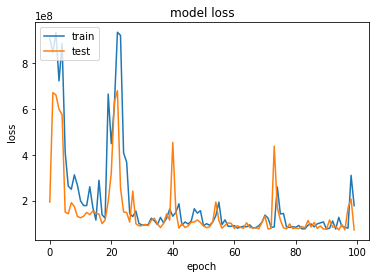

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

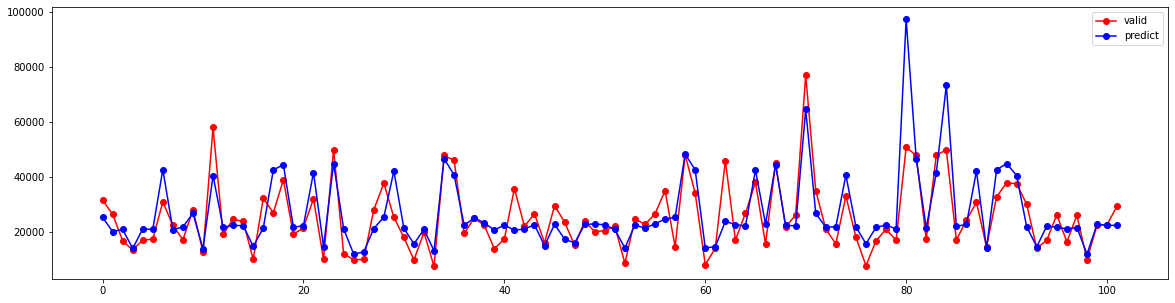

In [ ]:
predict_RNN= model_pm25_rnn.predict(X_validation)
plt.figure(figsize=(20,5))
plt.plot(Y_validation,'ro-')
plt.plot(predict_RNN,'bo-')
plt.legend(['valid', 'predict'], loc='upper right')
plt.show()

# Dense toàn tập

In [ ]:
data_reshaped=X_scale.reshape(X_scale.shape[0],X_scale.shape[1])
X_train,X_val_test,Y_train,Y_val_test = train_test_split(data_reshaped,Y_scale,test_size=0.2)
X_test,X_validation,Y_test,Y_validation=train_test_split(X_val_test,Y_val_test,test_size=0.5)

In [ ]:
best_data_train_1=X_train
best_data_test_1=X_test

In [ ]:
print(X_train.shape)
print(X_test.shape)

(811, 53)
(101, 53)


In [ ]:
Y_scale

array([44850., 39900., 47900., ..., 16899., 29499., 17699.])

In [ ]:
model = Sequential()
model.add(Dense(units=128,activation='relu',input_dim=(53)))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
# model.add(Dense(units=4,activation='relu'))
# model.add(Dense(units=2,activation='relu'))
model.add(Dense(units=1,activation='relu'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 128)               6912      
_________________________________________________________________
dense_68 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_69 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_70 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_71 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 9         
Total params: 17,921
Trainable params: 17,921
Non-trainable params: 0
_________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='mse')
history=model.fit(X_train,Y_train,batch_size=53,epochs=200,validation_data=(X_test,Y_test))

Epoch 1/200
16/16 [==============================] - 1s 14ms/step - loss: 0.0301 - val_loss: 0.0346
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0287 - val_loss: 0.0268
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0207 - val_loss: 0.0196
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0134 - val_loss: 0.0163
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.0115
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0081 - val_loss: 0.0096
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0069
Epoch 8/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0065
Epoch 9/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0053
Epoch 10/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0037 - val_loss: 0.0045
Epoch 11

dict_keys(['loss', 'val_loss'])


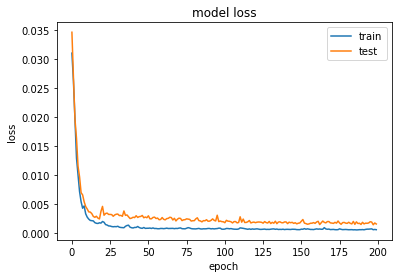

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

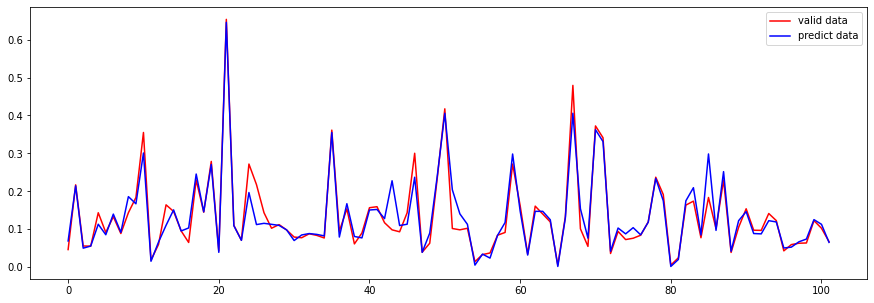

In [ ]:
predict_Denses= model.predict(X_validation)
plt.figure(figsize=(15,5))
plt.plot(Y_validation,c='r')
plt.plot(predict_Denses,c='b')
plt.legend(['valid data', 'predict data'], loc='upper right')
plt.show()